# Netflix Userbase Analysis 2023: Unveiling Revenue Patterns, Subscription Dynamics, and User Behavior

This report presents a comprehensive analysis of Netflix's userbase transactions in 2023, delving into aspects such as subscription types, revenue dynamics, and user behavior. It offers insights into revenue patterns, subscription preferences, and key performance metrics, providing valuable information for strategic decision-making. 

The report is structured into three main sections: "Data Description" which gives a basic description of the dataset used for this analysis; "Revenue Overview" examining revenue dynamics and its variations across user demographics; and "Key Performance Metrics" covering ARPU, churn rates, and user lifespan. The findings aim to guide the Netflix team in optimizing subscription plans and enhancing user retention.

## 1. Data Description

The dataset provides a snapshot of all Netflix userbase's transactions in 2023, showcasing various aspects of user subscriptions, revenue, account details, and activity:

• User ID: Each row represents a unique user, identified by their User ID.

• Subscription Type: This column indicates the user’s subscription type, which can be Basic, Standard, or Premium.

• Period Revenue: This column shows the total revenue generated from the user’s subscription for the whole ‘Plan Duration’ period.

• Join Date: This column records the date the user joined Netflix.

• Payment Date: This column notes the date of a specific transaction.

• Country: This column specifies the country in which the user is located.

• Age: This column represents the age of the user.

• Gender: This column indicates the gender of the user.

• Device: This column provides insights into user behavior and preferences, indicating the device type used by the user, such as Smart TV, Mobile, Desktop, or Tablet.

• Plan Duration: This column shows the duration of the user’s subscription plan, which can be 1, 6, or 12 months.

In [1]:
import pandas as pd
import analytics.revenue as rv
import analytics.stat_tests as st
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from dateutil.relativedelta import relativedelta
import warnings

In [2]:
df = pd.read_csv('netflix.csv')

## 2. Revenue Overview

### 2.1. Revenue Dynamics

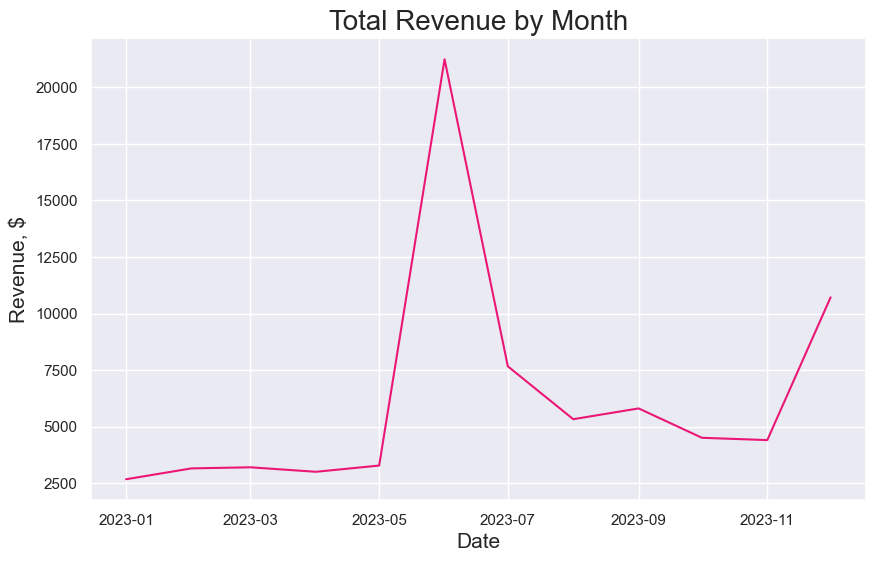

In [3]:
df['Payment Date'] = pd.to_datetime(df['Payment Date'])
df['YearMonth'] = df['Payment Date'].dt.to_period('M')
df_grouped = df.groupby('YearMonth')['Period Revenue'].sum().reset_index()
df_grouped['YearMonth'] = df_grouped['YearMonth'].dt.to_timestamp()

sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='YearMonth', y='Period Revenue', data=df_grouped, color='#eb1776')
plt.title("Total Revenue by Month", fontsize = 20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Revenue, $', fontsize=15);

In 2023 Total Revenues were steadily around 2500-3000 US dollars from January to May. A 7 times spike in revenues in June could be attributed to a few possible reasons:

• Show releases. Subscriptions could be increasing due to the release of certain films or shows.

• Seasonal spike: Higher revenue could be attributed to the summer's start or the academic year's end.

• Other reasons: Changes to subscription conditions, competitors' advantage, good communication strategy.

A smaller spike is seen again in December, which could be proving the hypothesis about subscriptions number increasing during holidays.

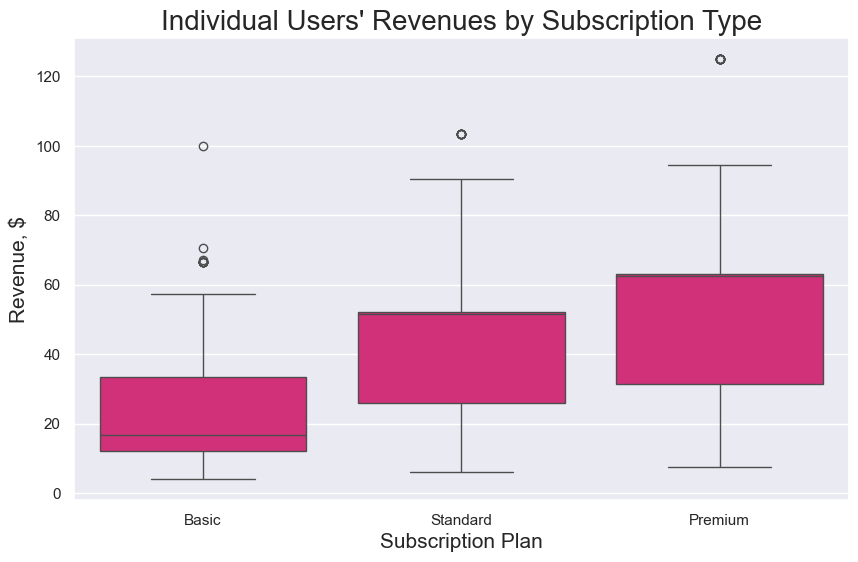

In [4]:
df['Period Revenue'] = df['Period Revenue'].astype(float)
df_grouped = df.groupby(['User ID', 'Subscription Type'])['Period Revenue'].sum().reset_index()

subscriptions_difference = st.one_way_anova_for_df(df=df_grouped, category_column='Subscription Type', 
                                                   group_of_interest=df_grouped['Subscription Type'].unique(), 
                                                   numerical_column='Period Revenue')

sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Subscription Type', y='Period Revenue', data=df_grouped, color='#eb1776')
plt.title("Individual Users' Revenues by Subscription Type", fontsize = 20)
plt.xlabel('Subscription Plan', fontsize=15)
plt.ylabel('Revenue, $', fontsize=15);

The graph shows that the Basic plan has a median revenue of around 40 US dollars with outliers extending up to approximately 80. The Standard plan’s median revenue is around 60 with a wider IQR than the Basic plan and outliers reaching close to 100 US dollars. The Premium plan shows a median revenue near 80 with outliers extending beyond 100. 

• The Basic plan has a low median revenue because most users who choose this plan are either new or casual users who do not use the app frequently or for a long time. The Basic subscription is also the cheapest.

• The Standard plan has a higher median revenue than the Basic plan because most users who choose this plan are either regular or loyal users who use the app more often or for a longer time.

• The Premium plan has the highest median revenue because most users who choose this plan are either premium or elite users who use the app extensively or for a very long time. 

Standard and Premium subscriptions may have a lower 1st quantile, as there may be more users just testing out expansive subscriptions and purchasing them for shorter periods, than Basic ones.
The p-value of the one-way ANOVA test for 'Subscriptions Types' is 0.0. The null hypothesis is that all group means are equal, and p-value of less than 0.05 indicates that we can reject this hypothesis. This means that subscription types' means are significantly different.

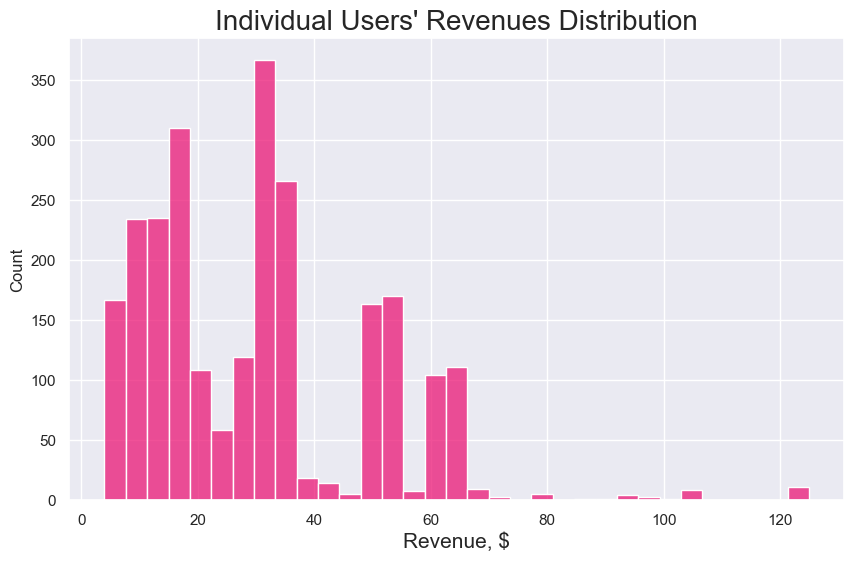

In [5]:
df_grouped = df.groupby('User ID')['Period Revenue'].sum().reset_index()

sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.histplot(x='Period Revenue', data=df_grouped, color='#eb1776')
plt.title("Individual Users' Revenues Distribution", fontsize = 20)
plt.xlabel('Revenue, $', fontsize=15);

This graph is a bar graph that shows the distribution of revenues gained from individual users. The graph shows that most users bring between 20 and 50 dollars, with the highest count of users bringing around 40 dollars. The number of users decreases as the revenue increases beyond 50 dollars, indicating that higher revenues are less common from the observed group.

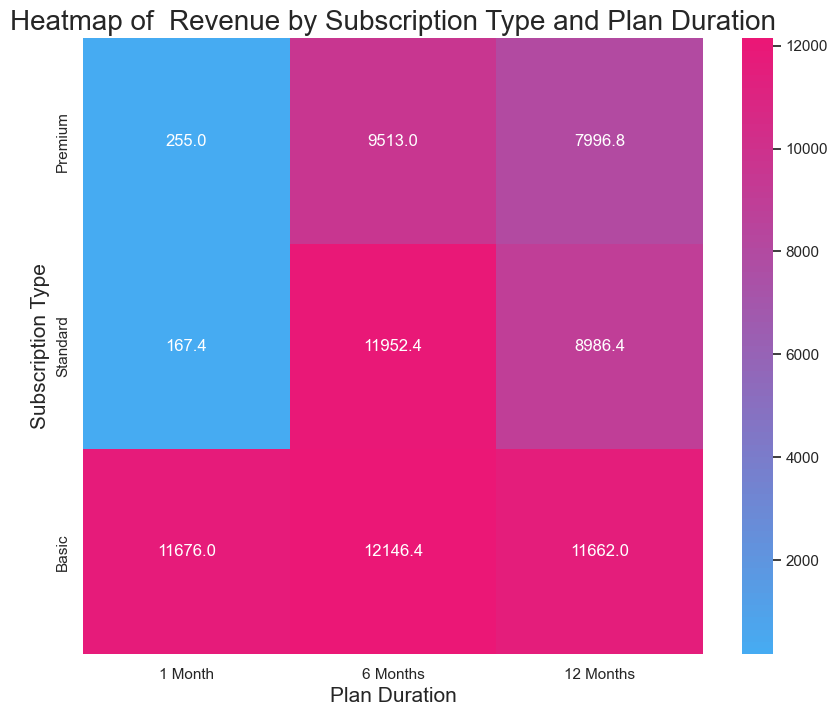

In [6]:
pivot_table = pd.pivot_table(df, values='Period Revenue', index='Subscription Type', columns='Plan Duration', aggfunc='sum')

subscription_order = ['Premium', 'Standard','Basic',]
plan_duration_order = ['1 Month', '6 Months', '12 Months']

pivot_table = pivot_table.reindex(subscription_order)
pivot_table = pivot_table[plan_duration_order]

colors = ["#46abf2", "#eb1776"]
cm = LinearSegmentedColormap.from_list("custom", colors, N=100)
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap=cm)
plt.title("Heatmap of  Revenue by Subscription Type and Plan Duration", fontsize=20)
plt.xlabel('Plan Duration', fontsize=15)
plt.ylabel('Subscription Type', fontsize=15)

df1 = df.groupby(['User ID', 'Subscription Type', 'Plan Duration'])['Period Revenue'].sum().reset_index()
dictionary_with_groups = {'Subscription Type': df['Subscription Type'].unique(), 'Plan Duration': df['Plan Duration'].unique()};

The graph shows that the Basic subscription type has the highest revenue for all plan durations, followed by Standard and then Premium. This could be due to the lower price and higher demand of the Basic subscription type compared to the other types. The graph also shows that the 6 Months plan duration has the highest revenue for all subscription types, followed by 12 Months and then 1 Month. This could be due to the longer commitment and loyalty of the 6 Months plan users compared to the other users.

The two-way ANOVA test results show that both Subscription Type and Plan Duration have significant main effects on Period Revenue, as their p-values are 0.005 and 0.0009, respectively. This means that the mean Period Revenue differs significantly across the different levels of Subscription Type and Plan Duration. However, the test results also show that there is no significant interaction effect between Subscription Type and Plan Duration, as the p-value is 0.0. This means that the effect of Subscription Type on Period Revenue does not depend on the level of Plan Duration, and vice versa.

### 2.2. Revenue by Customer

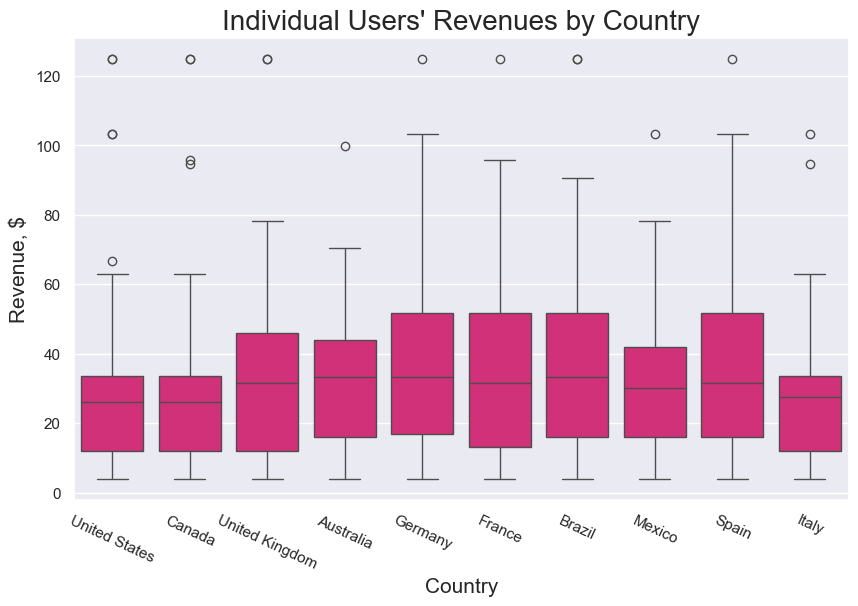

In [7]:
df_grouped = df.groupby(['User ID', 'Country'])['Period Revenue'].sum().reset_index()
unique_countries = df_grouped['Country'].unique()
countries_difference = st.one_way_anova_for_df(df=df_grouped, category_column='Country', group_of_interest=unique_countries,
                                     numerical_column='Period Revenue')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='Period Revenue', data=df_grouped, color='#eb1776')
plt.title("Individual Users' Revenues by Country", fontsize = 20)
plt.xlabel('Country', fontsize=15)
plt.ylabel('Revenue, $', fontsize=15)
plt.xticks(rotation=335);

The graph shows that there is a consistent average revenue across all countries, with slight variations. The United States and the United Kingdom have slightly lower median revenues compared to other countries like Germany and France. This could be due to a variety of factors including the purchasing power of individuals, the popularity of the product/service in those regions, or economic conditions.

According to the one-way ANOVA test, there is not enough evidence to reject the null hypothesis and comment that there is a statistically significant difference in the period revenue between the different countries (with p-value of 0.17 and H0 of no significant differences between the means).

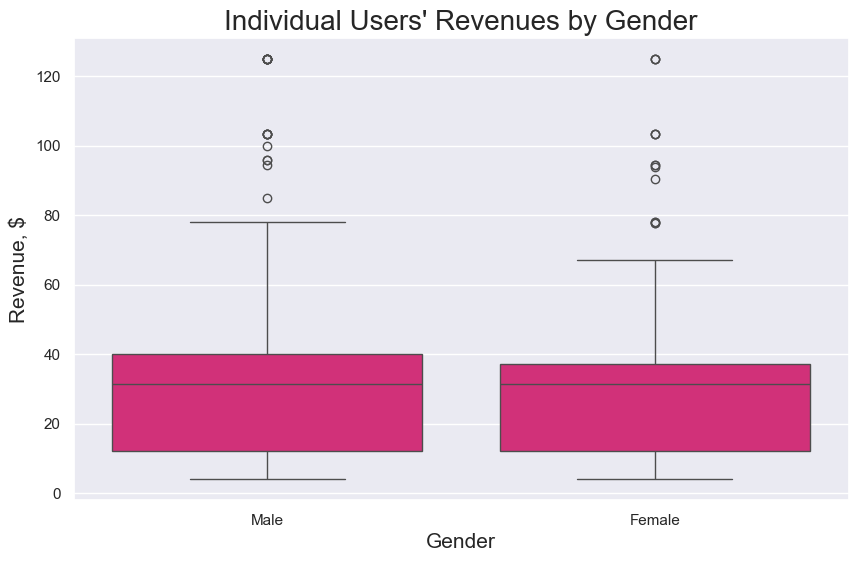

In [8]:
df_grouped = df.groupby(['User ID', 'Gender'])['Period Revenue'].sum().reset_index()
gender_difference = st.unpaired_t_test_for_df(df=df_grouped, category_column='Gender', group1='Male', group2='Female', 
                                              numerical_column='Period Revenue', tail='two')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Period Revenue', data=df_grouped, color='#eb1776')
plt.title("Individual Users' Revenues by Gender", fontsize = 20)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Revenue, $', fontsize=15);

This graph is a box plot that shows the median revenues generated from individual users by gender. The graph shows that both genders have similar median revenues around 30 dollars. For males, there is a slightly wider range of revenues that might not be significant enough to focus attention on.

The unpaired t-test results show the mean of male revenues is not significantly different from the mean of female revenues (with a p-value of 0.76 and H0 of no significant differences between the means).

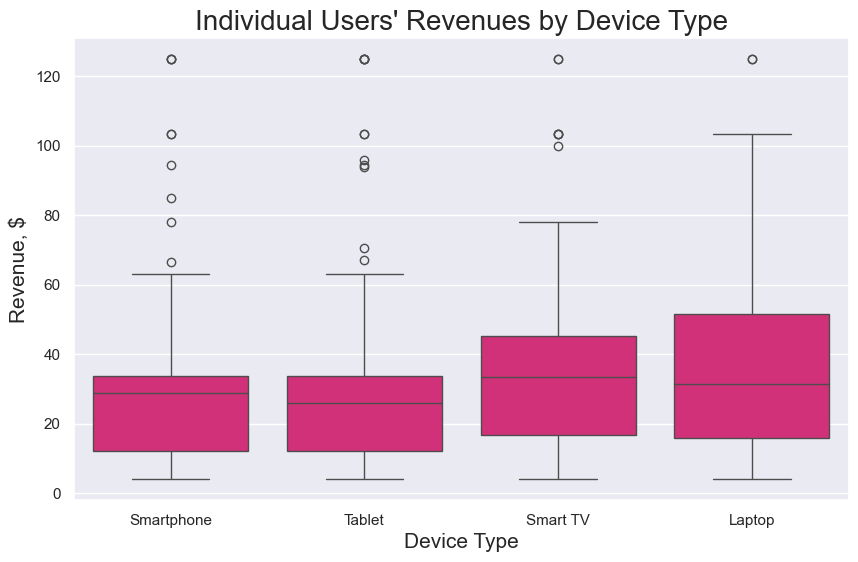

In [9]:
df_grouped = df.groupby(['User ID', 'Device'])['Period Revenue'].sum().reset_index()

unique_device_types = df_grouped['Device'].unique()
device_difference = st.one_way_anova_for_df(df=df_grouped, category_column='Device', group_of_interest=unique_device_types,
                                     numerical_column='Period Revenue')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Device', y='Period Revenue', data=df_grouped, color='#eb1776')
plt.title("Individual Users' Revenues by Device Type", fontsize = 20)
plt.xlabel('Device Type', fontsize=15)
plt.ylabel('Revenue, $', fontsize=15);

The graph shows that Laptop users have a wider IQR and more outliers than other device types, indicating more variability and diversity in the user base. Smartphone and Tablet users have similar distributions with fewer outliers, indicating more consistency and homogeneity in the user base. Smart TV users have a compact IQR but several high-revenue outliers, indicating a more niche and loyal user base.

Some possible reasons for the variation and distribution of revenues by device type are:

• As Laptops and Smart TVs have wider screens, people might subscribe with these devices more often than with small-screen devices like Smartphones and Tablets.

• As Smartphones and Tablets are more mobile devices, people might more often use them to test the subscription just to switch to another device after that.

The one-way ANOVA test results show that we can reject the hypothesis all groups' means are equal (with a p-value of 0.01 and H0 of no significant differences between the means).

## 3. Key Performance Metrics

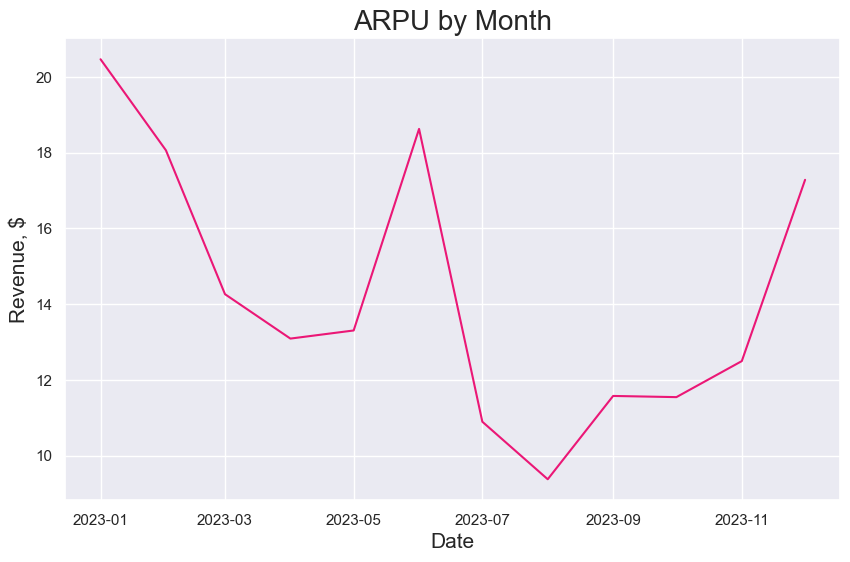

In [10]:
warnings.filterwarnings('ignore')

df['Payment Date'] = pd.to_datetime(df['Payment Date'])
df['YearMonth'] = df['Payment Date'].dt.to_period('M')
df_grouped = df.groupby('YearMonth')['Period Revenue'].sum().reset_index()
df_grouped['YearMonth'] = df_grouped['YearMonth'].dt.to_timestamp()

arpu_df = pd.DataFrame(columns=['Date', 'ARPU'])

for d, date in enumerate(df_grouped['YearMonth'].unique(), start=0):
    df_filtered = df[df['YearMonth'] == pd.Period(date, freq='M')]
    arpu = rv.arpu_calculation(df=df_filtered, revenue='Period Revenue', user_id='User ID', timespan='whole')
    new_row = {'Date': date, 'ARPU': arpu}
    arpu_df = pd.concat([arpu_df, pd.DataFrame([new_row])], ignore_index=True)

sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='ARPU', data=arpu_df, color='#eb1776')
plt.title("ARPU by Month", fontsize = 20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Revenue, $', fontsize=15);

The graph illustrates ARPU dynamics over the year. The ARPU peaks in January, June, and December indicate that at these times people probably tend to buy more expansive subscriptions (with longer plan durations and higher subscription types). This could be due to the holiday season, which motivates people to purchase longer or more premium subscriptions.

The graph shows that the ARPU ranges from 10 to 20 dollars, indicating a moderate level of revenue per user. 

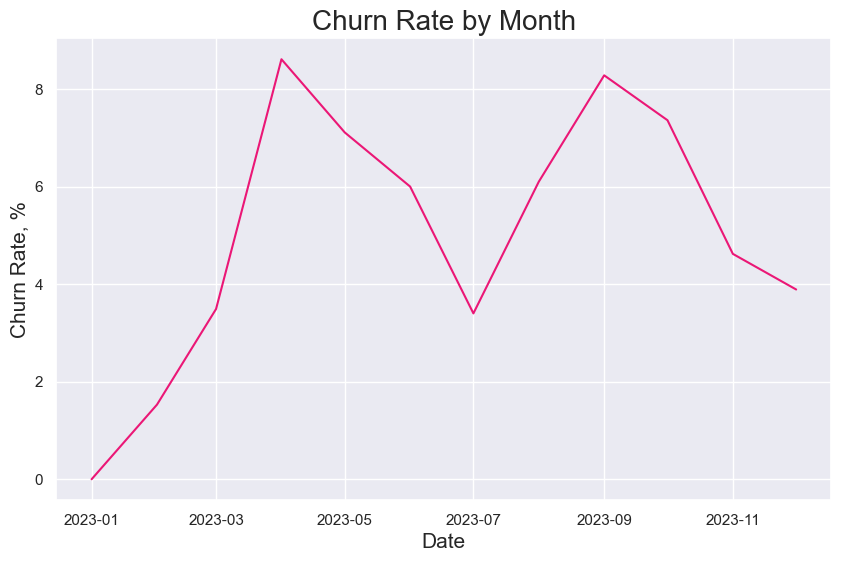

In [11]:
churn_rate_df = pd.DataFrame(columns=['Date', 'Churn'])
df['YearMonth'] = df['Payment Date'].dt.to_period('M')
df['YearMonth'] = df['YearMonth'].dt.to_timestamp()

for d, date in enumerate(df['YearMonth'].unique(), start=0):
    churn = rv.churn_rate_calculation(df=df, user_id='User ID', plan_duration='Plan Duration', date_split=date,
                                        date_column='Payment Date', timespan='1 months')
    new_row = {'Date': date, 'Churn': churn}
    churn_rate_df = pd.concat([churn_rate_df, pd.DataFrame([new_row])], ignore_index=True)

sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Churn', data=churn_rate_df, color='#eb1776')
plt.title("Churn Rate by Month", fontsize = 20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Churn Rate, %', fontsize=15);

The peak churn rates are seen in the busiest months (on the contrary to holiday times). Churn rates are the highest (around 8%) in April and September. The lowest churn rates are during holidays and right after them (lower than 4%). This could prove the 'holiday season' theory.

In [12]:
df['Payment Date'] = pd.to_datetime(df['Payment Date'])

df.loc[:, 'Duration'] = df.loc[:, 'Plan Duration'].apply(lambda x: int(x.split(" ")[0]))
df.loc[:, 'Last Day'] = df.apply(lambda row: row['Payment Date'] + relativedelta(months=int(row['Duration'])), axis=1)
df.loc[:, 'Last Day'] = pd.to_datetime(df['Last Day'])
df['Last Day'] = pd.to_datetime(df['Last Day'])
df['Lifespan'] = (df['Last Day'] - df['Payment Date']).dt.days

user_lifespans = df.groupby('User ID')['Lifespan'].sum()
average_lifespan = user_lifespans.mean()
ltv = rv.ltv_calculation(df=df, revenue='Period Revenue', plan_duration='Plan Duration', user_id='User ID', 
                         date_column='Payment Date', timespan='whole')

The average calculated user lifespan is around 260 days and LTV is 108 dollars. This means that, on average, a user stays with Netflix for about 8.6 months and contributes 108 dollars to revenue during that time. To evaluate these numbers, it is needed to compare them with some benchmarks, such as your industry average, competitors, or goals.

After conducting some basic research, it can be seen that Netflix's usual user lifespan is about 25 months and LTV is nearly 290, meaning both metrics are 3 times higher than the calculated one. Considering that the dataset only contains users who joined in 2023 and does not include any active users since earlier times, it might be concluded that the sample is too small to make any conclusions.

## 4. Conclusions

In conclusion, the comprehensive analysis of Netflix's 2023 userbase transactions reveals nuanced patterns that shed light on the dynamics of revenue generation. The year-long examination of Total Revenues indicates two notable spikes in June and December. The June surge, potentially linked to new show releases or seasonal influences, is a pivotal point requiring further investigation. Similarly, the December uptick aligns with the hypothesis of increased subscriptions during the holiday season.

Delving into subscription types, it's evident that Basic, Standard, and Premium plans exhibit distinct revenue profiles. The Basic plan, being the most economical, attracts a substantial user base but contributes lower median revenue, typically from new or infrequent users. In contrast, the Standard plan, with a higher median revenue, represents regular and loyal users who engage with the platform consistently. The Premium plan, associated with elite users, commands the highest median revenue, indicating extensive and prolonged usage.

Statistical tests, including the one-way ANOVA, affirm the significant differences in revenue among subscription types. This insight is crucial for tailoring marketing and engagement strategies specific to each subscription tier, optimizing user experience and revenue potential.

Moving beyond subscription types, the exploration of revenue across different countries offers intriguing insights. While average revenues remain relatively consistent across nations, variations in median revenues suggest potential market-specific factors influencing user spending. The absence of statistical significance in the ANOVA test may indicate a need for a more nuanced understanding of regional user behavior or localized marketing efforts.

Unpacking revenue by gender provides further granularity, showing similar median revenues for both males and females. The lack of significant difference, supported by the unpaired t-test, suggests that gender may not be a decisive factor in influencing revenue. This insight can guide targeted marketing strategies that resonate with a diverse user demographic.

Device-based revenue analysis reveals interesting patterns, with Laptop users exhibiting greater variability and Smart TV users displaying a more niche but loyal user base. The one-way ANOVA test emphasizes the significance of device type in influencing revenue. Understanding these nuances can inform platform optimization for different devices, enhancing user satisfaction and potentially driving higher revenues.

Peaks in ARPU during January, June, and December suggest that users tend to opt for more expansive subscriptions during these periods, possibly due to the holiday season. However, the inverse relationship between churn rates and busier months, with higher churn rates in April and September, introduces a strategic challenge. This pattern may necessitate targeted retention efforts during peak churn periods, capitalizing on holiday seasons for customer acquisition.

The calculated average user lifespan and LTV, while offering valuable insights, require cautious interpretation due to the limited dataset. Comparisons with industry benchmarks, specifically noting Netflix's usual metrics, highlight the need for a more extensive dataset that encompasses users from earlier periods.

In light of these findings, recommendations for the Netflix team include refining content release strategies, tailoring marketing campaigns to specific subscription types and user demographics, and implementing targeted retention efforts during peak churn periods. Continued analysis and adaptation based on user behavior and revenue dynamics will be essential for sustained growth and user satisfaction.